### **CartPole-v1 (maximum 500 steps) with a single deepQ-learning neural network.**
#### This algorithm was the first one and the simplest one used. It doesn't use Memory Replay
#### The input to the network consists of 4 float values (Cart Position, Cart Velocity, Pole Angle and Pole Velocity at the Tip).
#### The outputs of the network don't go through any activation function; instead of probabilities, the outputs are directly state-action values.
##### (The optimal policy involves choosing the Argmax of the output vector of the Neural Network as the action for the next step).
##### **This environment is considered to be solved when getting an average of 475 over 100 consecutive episodes.**

In [1]:
# Imports the libraries and creates the model (hyperparameter tunning was carried out to find out an efficient configuration)

import random
import numpy as np
from tensorflow import keras
import gym
env = gym.make('CartPole-v1')
model = keras.Sequential()
model.add (keras.layers.Dense(units = 32, input_shape=(4,), activation = "relu"))
model.add (keras.layers.Dense(units = 32, activation = "relu"))
model.add (keras.layers.Dense(units = 8, activation = "relu"))
model.add (keras.layers.Dense(units = 8, activation = "relu"))
model.add (keras.layers.Dense(units = 2))
model.compile(optimizer=keras.optimizers.Adam(lr=0.001),loss ="mse")
print (model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                160       
_________________________________________________________________
dense_1 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 264       
_________________________________________________________________
dense_3 (Dense)              (None, 8)                 72        
_________________________________________________________________
dense_4 (Dense)              (None, 2)                 18        
Total params: 1,570
Trainable params: 1,570
Non-trainable params: 0
_________________________________________________________________
None


In [2]:
# Training Loop

numberEpisodes = 1000

discount = 0.99
counter = 0
epsilon = 1
epsilonDecay = 0.99
rewards = []
for episode in range (numberEpisodes):
    epsilon = max (epsilon*epsilonDecay, 0.1)
    
    done = False
    prevObs = env.reset()
    
    episodeReward = 0
    for step in range (600):
        if done:
            break
        #env.render()
        
       

        target = model.predict(np.expand_dims(prevObs, axis = 0))[0]
        if (random.random()<epsilon):
            action = random.choice([0,1])
        else:
            action = np.argmax(target)

        obs, reward, done, _ = env.step (action)

        # Float (done) is 1 if the episode was finished (done is True) and 0 if done is False

        target[action] = reward + (1-float(done))*discount*np.amax(model.predict(np.expand_dims(obs, axis = 0)))

        model.fit(np.expand_dims(prevObs, axis=0), np.expand_dims(target, axis=0), epochs =1, verbose=0)

        if (counter%2000 == 0):
            model.save_weights("weights.h5")
            print ("WEIGHTS SAVED")
        prevObs = obs
        episodeReward += reward
        counter +=1
    print (episode, " Episode Reward: ", episodeReward, ".Epsilon:", epsilon)
    rewards.append(episodeReward)

env.close()
model.save_weights("weights.h5")

WEIGHTS SAVED
0  Episode Reward:  23.0 .Epsilon: 0.99
1  Episode Reward:  18.0 .Epsilon: 0.9801
2  Episode Reward:  24.0 .Epsilon: 0.9702989999999999
3  Episode Reward:  16.0 .Epsilon: 0.96059601
4  Episode Reward:  31.0 .Epsilon: 0.9509900498999999
5  Episode Reward:  17.0 .Epsilon: 0.9414801494009999
6  Episode Reward:  13.0 .Epsilon: 0.9320653479069899
7  Episode Reward:  45.0 .Epsilon: 0.92274469442792
8  Episode Reward:  11.0 .Epsilon: 0.9135172474836407
9  Episode Reward:  11.0 .Epsilon: 0.9043820750088043
10  Episode Reward:  19.0 .Epsilon: 0.8953382542587163
11  Episode Reward:  14.0 .Epsilon: 0.8863848717161291
12  Episode Reward:  12.0 .Epsilon: 0.8775210229989678
13  Episode Reward:  21.0 .Epsilon: 0.8687458127689781
14  Episode Reward:  11.0 .Epsilon: 0.8600583546412883
15  Episode Reward:  32.0 .Epsilon: 0.8514577710948754
16  Episode Reward:  16.0 .Epsilon: 0.8429431933839266
17  Episode Reward:  12.0 .Epsilon: 0.8345137614500874
18  Episode Reward:  39.0 .Epsilon: 0.8261

149  Episode Reward:  9.0 .Epsilon: 0.22145178723886094
150  Episode Reward:  8.0 .Epsilon: 0.21923726936647234
151  Episode Reward:  12.0 .Epsilon: 0.2170448966728076
152  Episode Reward:  12.0 .Epsilon: 0.21487444770607952
153  Episode Reward:  8.0 .Epsilon: 0.21272570322901874
154  Episode Reward:  11.0 .Epsilon: 0.21059844619672854
155  Episode Reward:  9.0 .Epsilon: 0.20849246173476127
156  Episode Reward:  9.0 .Epsilon: 0.20640753711741366
157  Episode Reward:  14.0 .Epsilon: 0.20434346174623952
158  Episode Reward:  10.0 .Epsilon: 0.20230002712877712
159  Episode Reward:  8.0 .Epsilon: 0.20027702685748935
160  Episode Reward:  14.0 .Epsilon: 0.19827425658891445
161  Episode Reward:  15.0 .Epsilon: 0.1962915140230253
162  Episode Reward:  12.0 .Epsilon: 0.19432859888279505
163  Episode Reward:  12.0 .Epsilon: 0.1923853128939671
164  Episode Reward:  9.0 .Epsilon: 0.19046145976502743
165  Episode Reward:  10.0 .Epsilon: 0.18855684516737714
166  Episode Reward:  9.0 .Epsilon: 0.186

319  Episode Reward:  18.0 .Epsilon: 0.1
320  Episode Reward:  23.0 .Epsilon: 0.1
321  Episode Reward:  12.0 .Epsilon: 0.1
322  Episode Reward:  10.0 .Epsilon: 0.1
323  Episode Reward:  49.0 .Epsilon: 0.1
324  Episode Reward:  14.0 .Epsilon: 0.1
325  Episode Reward:  9.0 .Epsilon: 0.1
326  Episode Reward:  13.0 .Epsilon: 0.1
327  Episode Reward:  12.0 .Epsilon: 0.1
328  Episode Reward:  19.0 .Epsilon: 0.1
329  Episode Reward:  21.0 .Epsilon: 0.1
330  Episode Reward:  79.0 .Epsilon: 0.1
331  Episode Reward:  14.0 .Epsilon: 0.1
332  Episode Reward:  18.0 .Epsilon: 0.1
333  Episode Reward:  12.0 .Epsilon: 0.1
334  Episode Reward:  50.0 .Epsilon: 0.1
335  Episode Reward:  17.0 .Epsilon: 0.1
336  Episode Reward:  39.0 .Epsilon: 0.1
337  Episode Reward:  13.0 .Epsilon: 0.1
338  Episode Reward:  11.0 .Epsilon: 0.1
339  Episode Reward:  34.0 .Epsilon: 0.1
340  Episode Reward:  11.0 .Epsilon: 0.1
341  Episode Reward:  15.0 .Epsilon: 0.1
342  Episode Reward:  10.0 .Epsilon: 0.1
343  Episode Rewa

518  Episode Reward:  120.0 .Epsilon: 0.1
519  Episode Reward:  23.0 .Epsilon: 0.1
520  Episode Reward:  17.0 .Epsilon: 0.1
521  Episode Reward:  18.0 .Epsilon: 0.1
WEIGHTS SAVED
522  Episode Reward:  21.0 .Epsilon: 0.1
523  Episode Reward:  21.0 .Epsilon: 0.1
524  Episode Reward:  85.0 .Epsilon: 0.1
525  Episode Reward:  76.0 .Epsilon: 0.1
526  Episode Reward:  145.0 .Epsilon: 0.1
527  Episode Reward:  153.0 .Epsilon: 0.1
528  Episode Reward:  64.0 .Epsilon: 0.1
529  Episode Reward:  109.0 .Epsilon: 0.1
530  Episode Reward:  81.0 .Epsilon: 0.1
531  Episode Reward:  196.0 .Epsilon: 0.1
532  Episode Reward:  29.0 .Epsilon: 0.1
533  Episode Reward:  98.0 .Epsilon: 0.1
534  Episode Reward:  231.0 .Epsilon: 0.1
535  Episode Reward:  101.0 .Epsilon: 0.1
536  Episode Reward:  92.0 .Epsilon: 0.1
537  Episode Reward:  160.0 .Epsilon: 0.1
538  Episode Reward:  186.0 .Epsilon: 0.1
WEIGHTS SAVED
539  Episode Reward:  307.0 .Epsilon: 0.1
540  Episode Reward:  78.0 .Epsilon: 0.1
541  Episode Reward

712  Episode Reward:  33.0 .Epsilon: 0.1
713  Episode Reward:  18.0 .Epsilon: 0.1
714  Episode Reward:  19.0 .Epsilon: 0.1
715  Episode Reward:  21.0 .Epsilon: 0.1
716  Episode Reward:  29.0 .Epsilon: 0.1
717  Episode Reward:  25.0 .Epsilon: 0.1
718  Episode Reward:  33.0 .Epsilon: 0.1
WEIGHTS SAVED
719  Episode Reward:  44.0 .Epsilon: 0.1
720  Episode Reward:  29.0 .Epsilon: 0.1
721  Episode Reward:  34.0 .Epsilon: 0.1
722  Episode Reward:  24.0 .Epsilon: 0.1
723  Episode Reward:  23.0 .Epsilon: 0.1
724  Episode Reward:  18.0 .Epsilon: 0.1
725  Episode Reward:  27.0 .Epsilon: 0.1
726  Episode Reward:  33.0 .Epsilon: 0.1
727  Episode Reward:  31.0 .Epsilon: 0.1
728  Episode Reward:  26.0 .Epsilon: 0.1
729  Episode Reward:  31.0 .Epsilon: 0.1
730  Episode Reward:  29.0 .Epsilon: 0.1
731  Episode Reward:  14.0 .Epsilon: 0.1
732  Episode Reward:  15.0 .Epsilon: 0.1
733  Episode Reward:  21.0 .Epsilon: 0.1
734  Episode Reward:  29.0 .Epsilon: 0.1
735  Episode Reward:  29.0 .Epsilon: 0.1
73

902  Episode Reward:  94.0 .Epsilon: 0.1
903  Episode Reward:  10.0 .Epsilon: 0.1
904  Episode Reward:  10.0 .Epsilon: 0.1
905  Episode Reward:  9.0 .Epsilon: 0.1
906  Episode Reward:  11.0 .Epsilon: 0.1
907  Episode Reward:  14.0 .Epsilon: 0.1
908  Episode Reward:  13.0 .Epsilon: 0.1
909  Episode Reward:  11.0 .Epsilon: 0.1
910  Episode Reward:  167.0 .Epsilon: 0.1
911  Episode Reward:  118.0 .Epsilon: 0.1
912  Episode Reward:  90.0 .Epsilon: 0.1
913  Episode Reward:  12.0 .Epsilon: 0.1
914  Episode Reward:  114.0 .Epsilon: 0.1
915  Episode Reward:  107.0 .Epsilon: 0.1
916  Episode Reward:  142.0 .Epsilon: 0.1
917  Episode Reward:  147.0 .Epsilon: 0.1
WEIGHTS SAVED
918  Episode Reward:  154.0 .Epsilon: 0.1
919  Episode Reward:  171.0 .Epsilon: 0.1
920  Episode Reward:  162.0 .Epsilon: 0.1
921  Episode Reward:  174.0 .Epsilon: 0.1
922  Episode Reward:  180.0 .Epsilon: 0.1
923  Episode Reward:  183.0 .Epsilon: 0.1
924  Episode Reward:  170.0 .Epsilon: 0.1
925  Episode Reward:  191.0 .Ep

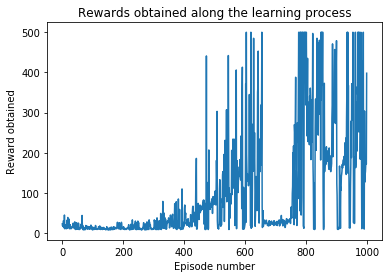

In [3]:
import matplotlib.pyplot as plt
plt.plot (list(range(len(rewards))), rewards)
plt.title("Rewards obtained along the learning process")
plt.xlabel("Episode number")
plt.ylabel("Reward obtained")
plt.show()

## As expected, this algorithm is unstable (suffers from catastrophic forgetting) given that it needs to both understand the environment and the consequences of the candidate actions with a rather shallow neural network (small changes to weight values may be quite relevant)
## Further trials with Memory Replay and a second target Network helped to improve the stability of the algorithm, reduce the number of episodes (information of the environment) needed and avoid the overestimates of certain state-action values as a result of poor generalization
### Nonetheless, this algorithm manages to learn and gets the maximum score (500.0) quite frequently!!